# Practica 5 - Transformada Z

**Author:** Cristian David Araujo A.

**ID:** 1089568350

**Date:** 18/09/2024


## Transformada Z

Aplique la transformada Z y halle la función de transferencia del sistema.

La ecuación en el dominio del tiempo es:

$$ y[n] = x[n] + 8x[n-1] - 2y[n-2] + 5y[n-1] $$


$$Y(Z) = X(Z) + 8X(Z)Z^{-1} - 2Y(Z)Z^{-2} + 5Y(Z)Z^{-1} $$

$$(1 + 2Z^{-2} - 5Z^{-1})Y(Z) = (1 + 8Z^{-1})X(Z)$$

$$ \frac{Y(Z)}{X(Z)} = \frac{1 + 8Z^{-1}}{1 + 2Z^{-2} - 5Z^{-1}} $$

$$ \frac{Y(Z)}{X(Z)} = \frac{Z^{2} + 8Z}{Z^{2} - 5Z + 2 } $$

Nota: Para desarrollar el laboratorio es necesario representar el numerador y denominador de la función de trans-
ferencia usando listas en Python. Recuerde que las listas solo contienen los coeficientes de los polinomios de Z
ordenados de mayor a menor orden.

### 1. Importe las funciones del archivo adjunto ztrans.py y úselas para graficar la respuesta en frecuencia y fase, la respuesta al impulso, la respuesta al escalón, y el diagrama de polos y ceros.

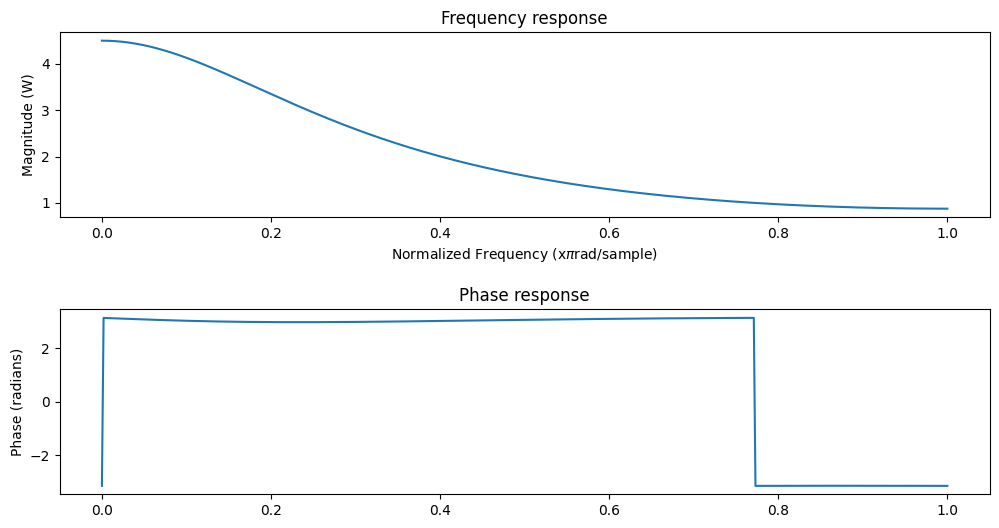

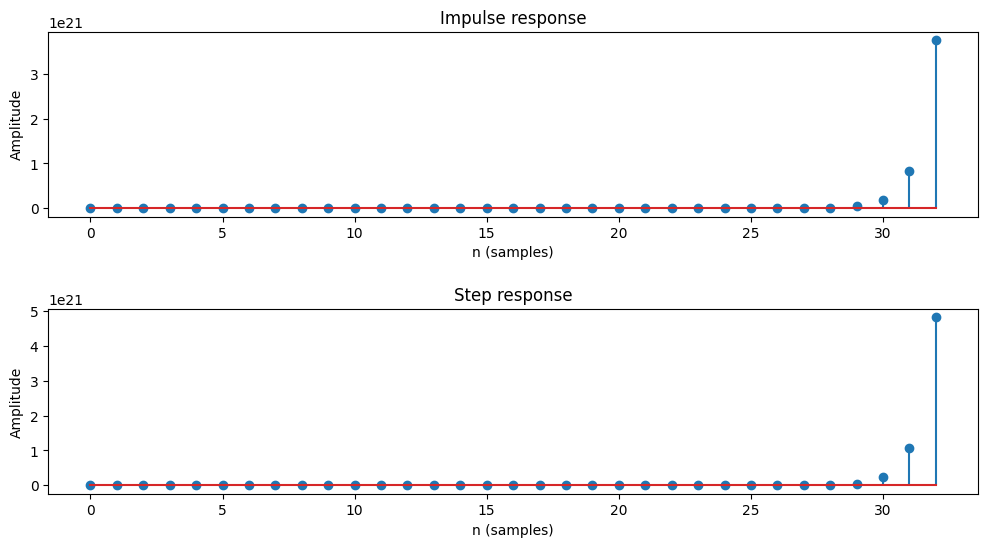

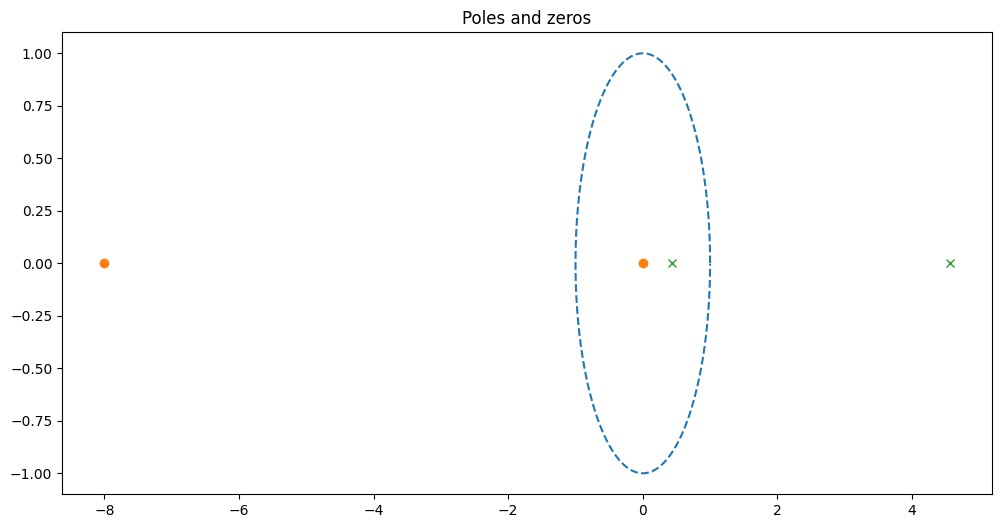

In [2]:
### 1. Importe las funciones del archivo adjunto ztrans.py y úselas para graficar la respuesta en frecuencia y fase, la respuesta al impulso, la respuesta al escalón, y el diagrama de polos y ceros.

import ztrans as zt
import numpy as np
import matplotlib.pyplot as plt

#Funcion de transferencia
num = [1, 8, 0]
den = [1, -5, 2]

#Respuesta en frecuencia y fase

zt.mfreqz(num, den)
zt.impz(num, den)
zt.zeropoles(num, den)

### 2. ¿Dónde están ubicados los polos y los ceros?

Los ceros estan ubicados en 0 y -8, por otro lado los polos estan ubicados en 0.438 y 4.562

### 3. ¿Qué se puede decir de la respuesta en frecuencia y fase de la función de transferencia?

En la respuesta en frecuencia se puede observar que la magnitud de la respuesta actua como un filtro pasa bajos, ya que la magnitud de la respuesta disminuye a medida que la frecuencia aumenta. En la fase se puede observar que la fase de la respuesta es lineal.

### 4. ¿Qué se puede decir acerca de la respuesta al impulso y al escalón?

En sistema muestra una respuesta al impulso inestable, y una respuesta al escalón inestable. Esto se puede ver en los gráficos de la respuesta al impulso y al escalón, donde se observa que la respuesta no tiende a cero, sino que se va al infinito.

### 5. ¿Qué se puede decir acerca de la estabilidad del sistema?

El sistema es inestable, ya que tiene un polo por fuera del círculo unitario.

## Transformada Z: Introducción a los filtros digitales

### 1. Genere una señal sinusoidal cuya frecuencia se incremente en el tiempo de forma cuadrática. La señal debe tener una duración de 40 segundos y una frecuencia de muestreo de 5000 Hz.

In [3]:
### 1. Genere una señal sinusoidal cuya frecuencia se incremente en el tiempo de forma cuadrática. La señal debe tener una duración de 40 segundos y una frecuencia de muestreo de 5000 Hz.

#Señal que varia cuadraticamente
fs = 5e3 #Frecuencia de muestreo Hz
t_max = 40 #Duracion de la señal s
t = np.linspace(0, 40, int(fs*t_max))
signal_2 = np.sin(2*np.pi*(t**2)*t)

### 2. Grafique y escuche la señal ¿Qué se puede decir acerca del audio?

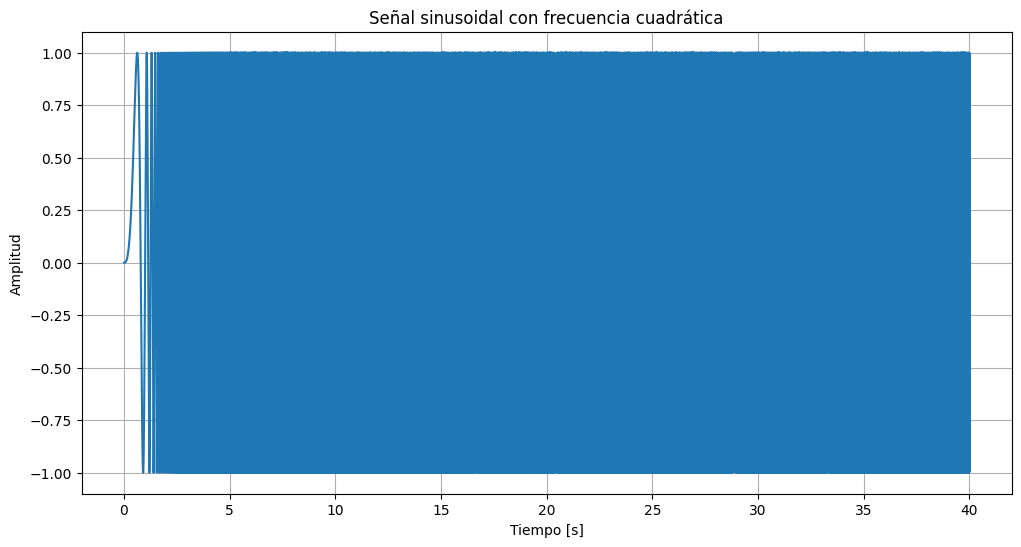

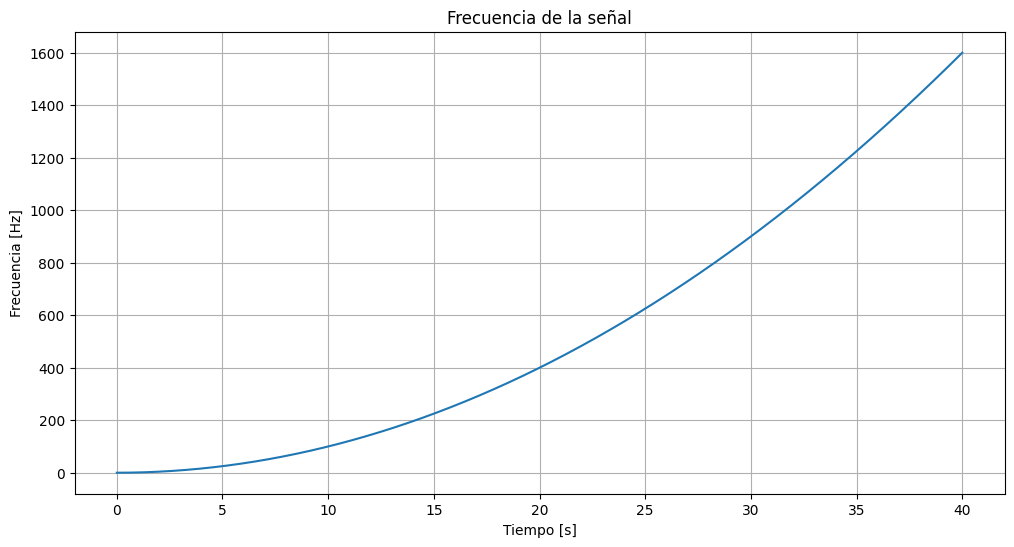

In [4]:
### 2. Grafique y escuche la señal ¿Qué se puede decir acerca del audio?

# Escuchar señal en notebook si se ejecuta en Jupyter
import IPython.display as ipd
display(ipd.Audio(signal_2, rate=fs))

#Graficar señal
plt.figure(figsize=(12, 6))
plt.plot(t, signal_2)
plt.title('Señal sinusoidal con frecuencia cuadrática')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

#Graficar crecimiento de la frecuencia
plt.figure(figsize=(12, 6))
plt.plot(t, t**2)
plt.title('Frecuencia de la señal')
plt.xlabel('Tiempo [s]')
plt.ylabel('Frecuencia [Hz]')
plt.grid()


### 3. Genere la función de transferencia de un filtro de respuesta finita al impulso (FIR) usando las siguientes instrucciones.

In [5]:
### 3. Genere la función de transferencia de un filtro de respuesta finita al impulso (FIR) usando las siguientes instrucciones.

import scipy.signal as signal
n = 9
num = signal.firwin(n, [0.2, 0.4], pass_zero=False)
den=np.zeros(n)
den[0] = 1

### 4. Grafique la respuesta en frecuencia y fase, la respuesta al impulso, la respuesta al escalón, y el diagrama de polos y ceros del filtro FIR.

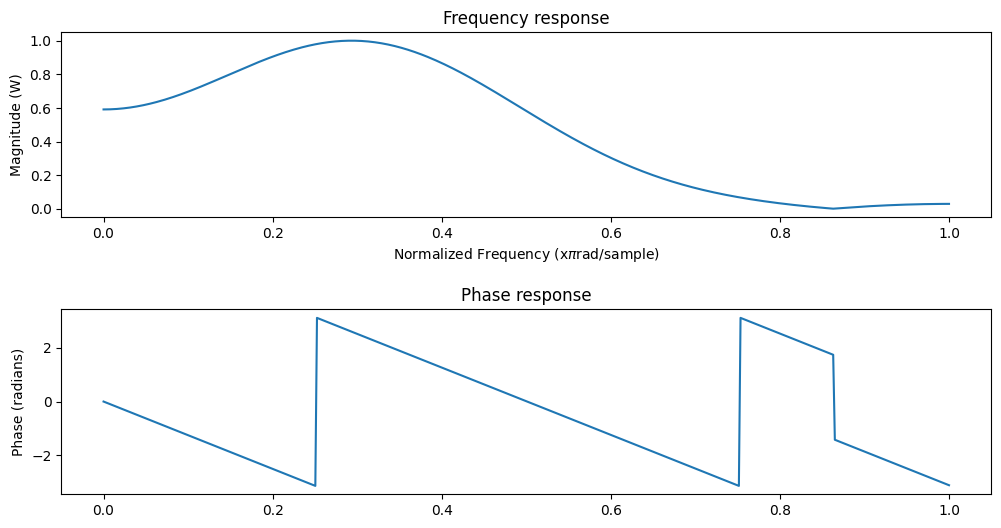

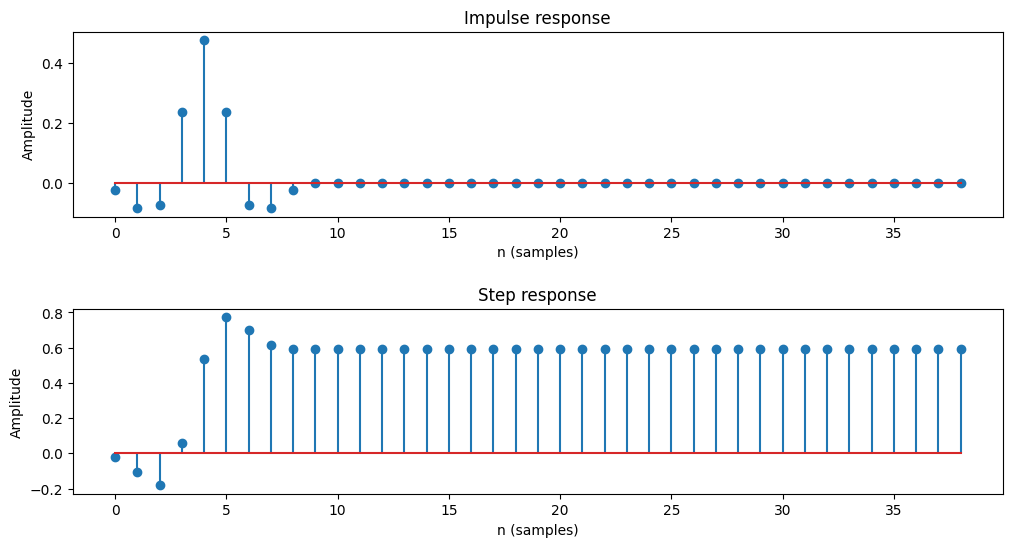

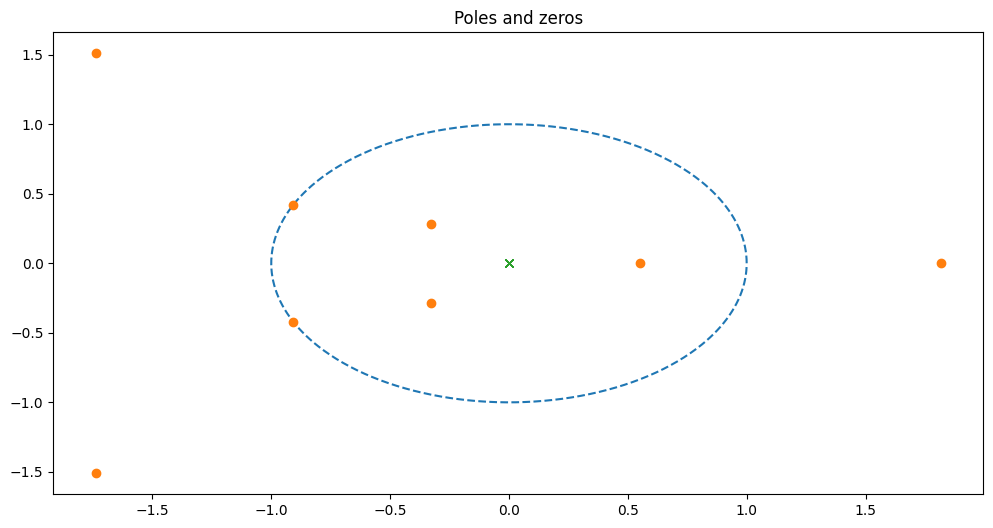

In [6]:
### 4. Grafique la respuesta en frecuencia y fase, la respuesta al impulso, la respuesta al escalón, y el diagrama de polos y ceros del filtro FIR.

#Respuesta en frecuencia y fase
zt.mfreqz(num, den)

#Respuesta al impulso
zt.impz(num, den)

#Diagrama de polos y ceros
zt.zeropoles(num, den)

### 5. ¿Qué puede concluir acerca de las gráficas anteriores? ¿Qué tipo de filtro es? ¿Cuáles son las frecuencias de corte? ¿Dónde están ubicados los polos y ceros? ¿Qué puede decir de la estabilidad del filtro?

El filtro es un pasa banda, con frecuencias de corte en 0.15 y 0.45 Los polos estan ubicados en el origen, por lo que el filtro es estable.

### 6. Calcule la respuesta del filtro ante la señal generada previamente. Grafique la señal antes y después de pasar por el filtro. ¿Qué le ocurrió a la señal? Tip: Recuerde que para calcular la respuesta del sistema ante una entrada debe usar la convolución.

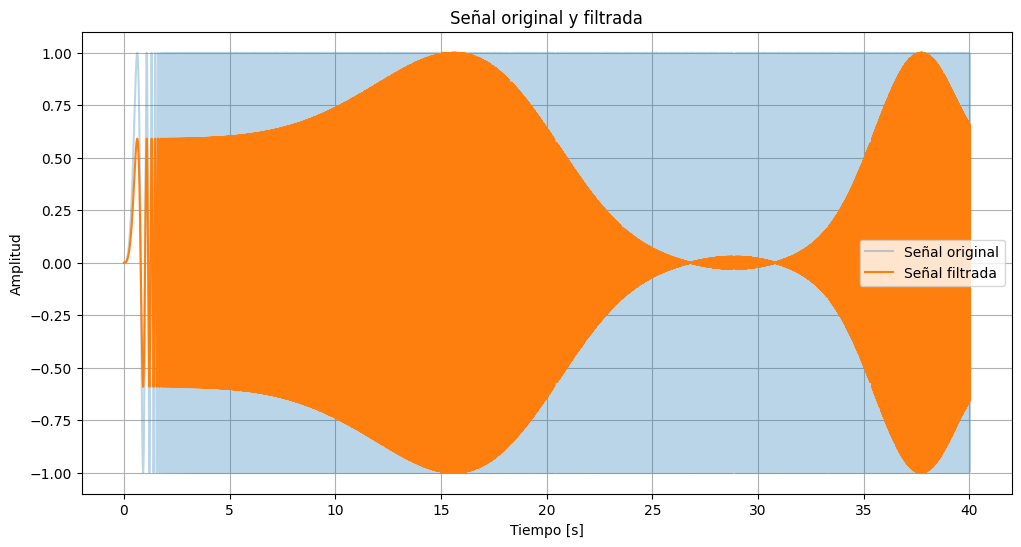

In [7]:
### 6. Calcule la respuesta del filtro ante la señal generada previamente. Grafique la señal antes y después de pasar por el filtro. ¿Qué le ocurrió a la señal? Tip: Recuerde que para calcular la respuesta del sistema ante una entrada debe usar la convolución.

#Respuesta del filtro ante la señal
signal_filtered = np.convolve(signal_2, num, mode='same')

#Graficar señal antes y despues de pasar por el filtro
plt.figure(figsize=(12, 6))
plt.plot(t, signal_2, label='Señal original', alpha=0.3)
plt.plot(t, signal_filtered, label='Señal filtrada')
plt.title('Señal original y filtrada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()


Como el filtro es un pasa banda, la señal original se atenua en las frecuencias que no son del rango del filtro, por lo que la señal filtrada es una versión atenuada de la señal original. Cuando la grafica sube demasiado la frecuencia de la señal, el filtro no puede seguir la señal no se atenua.

### 7. Aumente progresivamente el orden n del filtro (mı́nimo 3 veces), repita el procedimiento anterior (items 3, 4, 5, y 6), y concluya. Que puede decir de la respuesta en frecuencia, y de los polos y ceros.

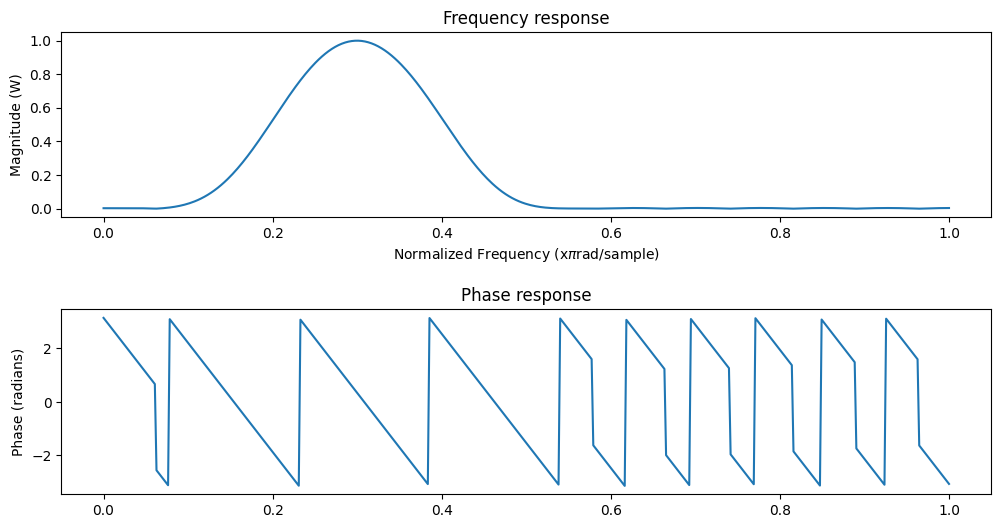

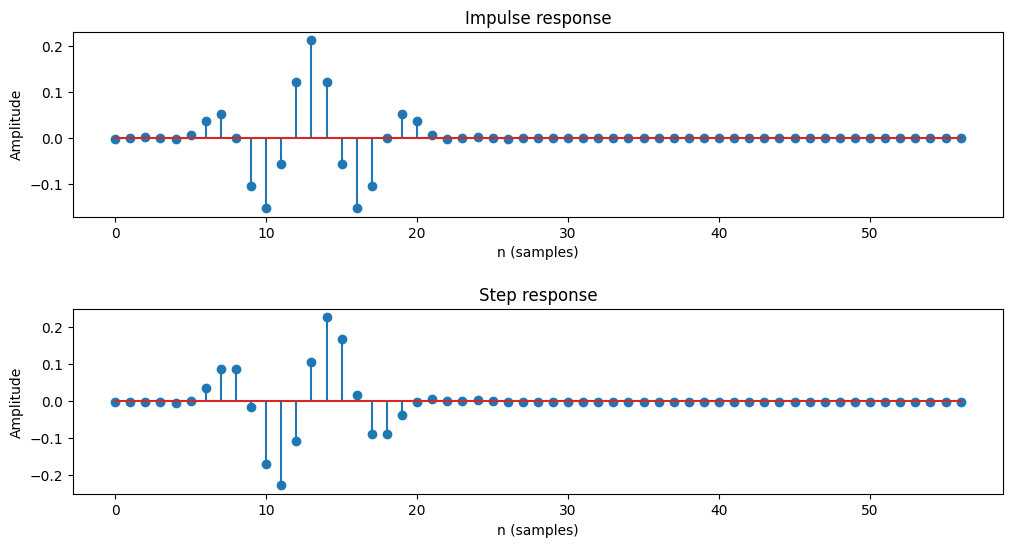

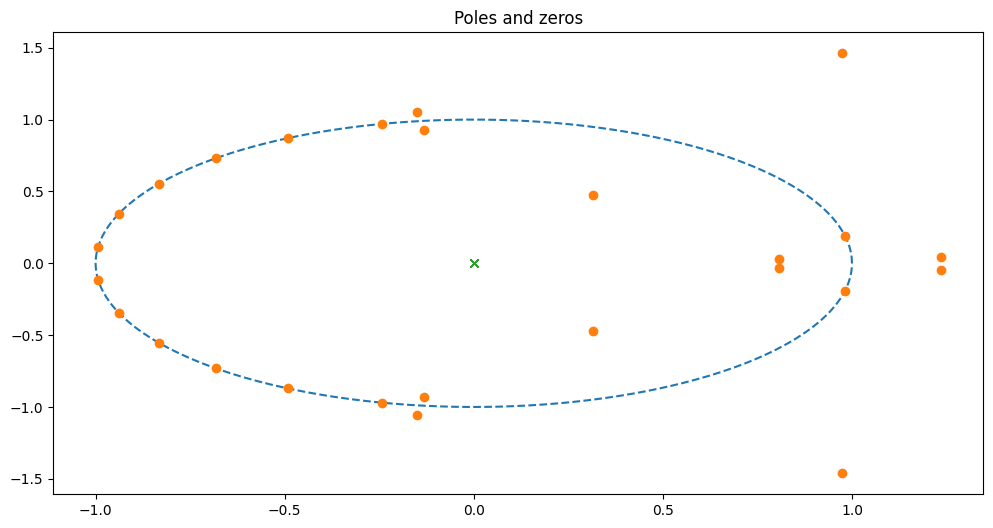

In [8]:
### 7. Aumente progresivamente el orden n del filtro (mı́nimo 3 veces), repita el procedimiento anterior (items 3, 4, 5, y 6), y concluya. Que puede decir de la respuesta en frecuencia, y de los polos y ceros.

#Orden 27
n = 27
num = signal.firwin(n, [0.2, 0.4], pass_zero=False)
den=np.zeros(n)
den[0] = 1

#Respuesta en frecuencia y fase
zt.mfreqz(num, den)
zt.impz(num, den)
zt.zeropoles(num, den)

Al aumentar el orden del filtro, la respuesta en frecuencia se hace más nítida y se acerca más a un filtro ideal. Los polos y ceros se distribuyen de manera más uniforme en el plano complejo.

### 8. Genere una señal sinusoidal cuya frecuencia se incremente en el tiempo de forma cúbica, la señal debe tener la misma duración (40 seg) y una frecuencia de muestreo de 3000 Hz. Repita los pasos 3, 4, 5 y 6. Concluya de acuerdo a las gráficas obtenidas.

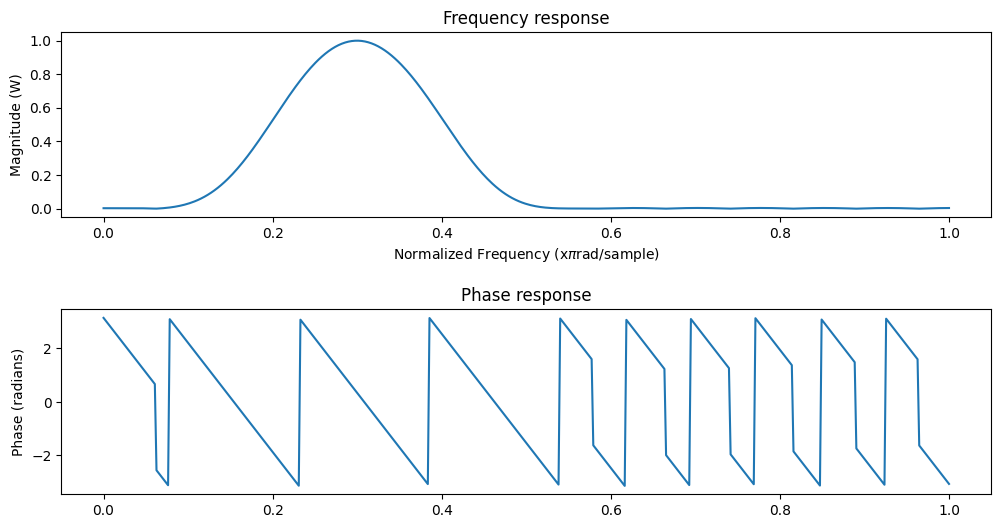

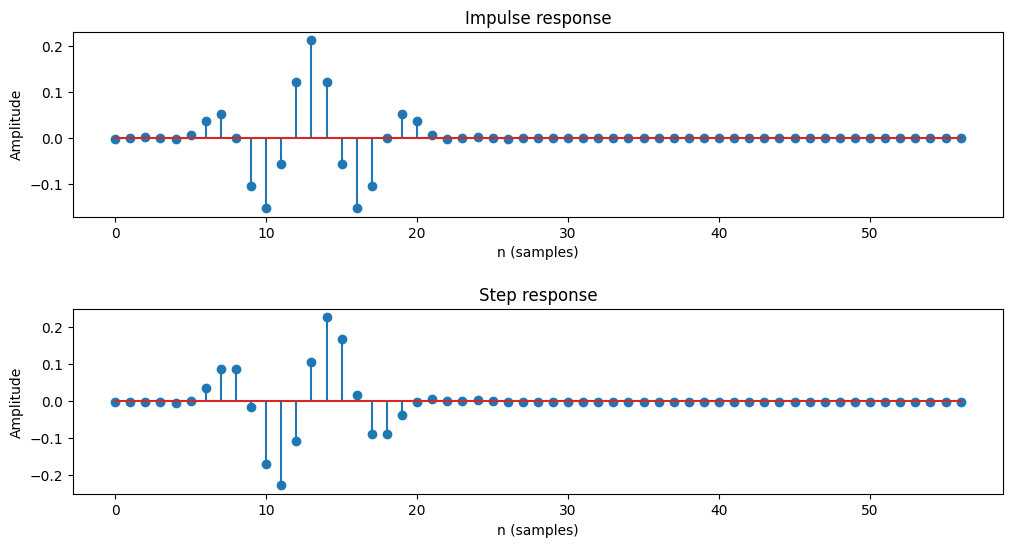

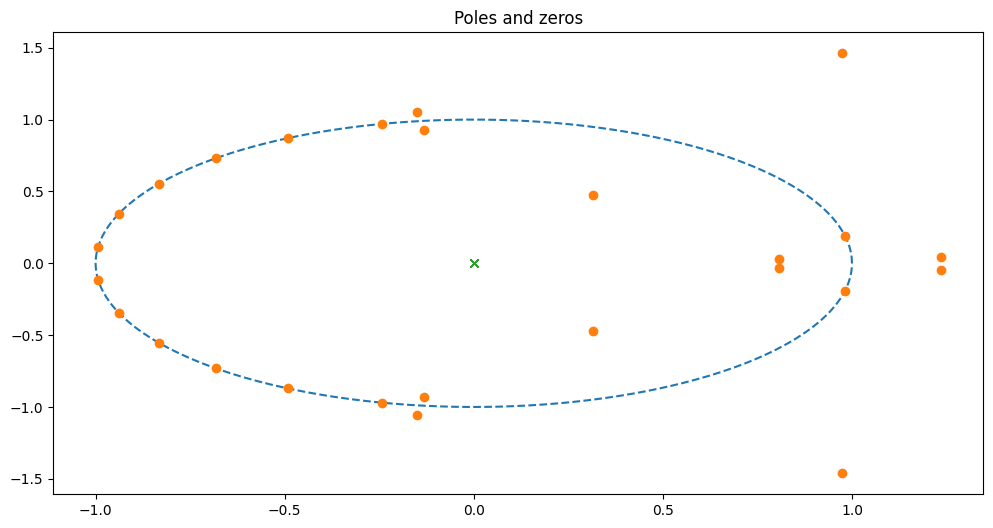

In [9]:
### 8. Genere una señal sinusoidal cuya frecuencia se incremente en el tiempo de forma cúbica, la señal debe tener la misma duración (40 seg) y una frecuencia de muestreo de 3000 Hz. Repita los pasos 3, 4, 5 y 6. Concluya de acuerdo a las gráficas obtenidas.

#Señal que varia cubicamente
fs = 3e3 #Frecuencia de muestreo Hz
t_max = 40 #Duracion de la señal s
t = np.linspace(0, 40, int(fs*t_max))
signal_3 = np.sin(2*np.pi*(t**3)*t)

#Funcion de transferencia
n = 27
num = signal.firwin(n, [0.2, 0.4], pass_zero=False)
den=np.zeros(n)
den[0] = 1

#Respuesta en frecuencia y fase
zt.mfreqz(num, den)
zt.impz(num, den)
zt.zeropoles(num, den)



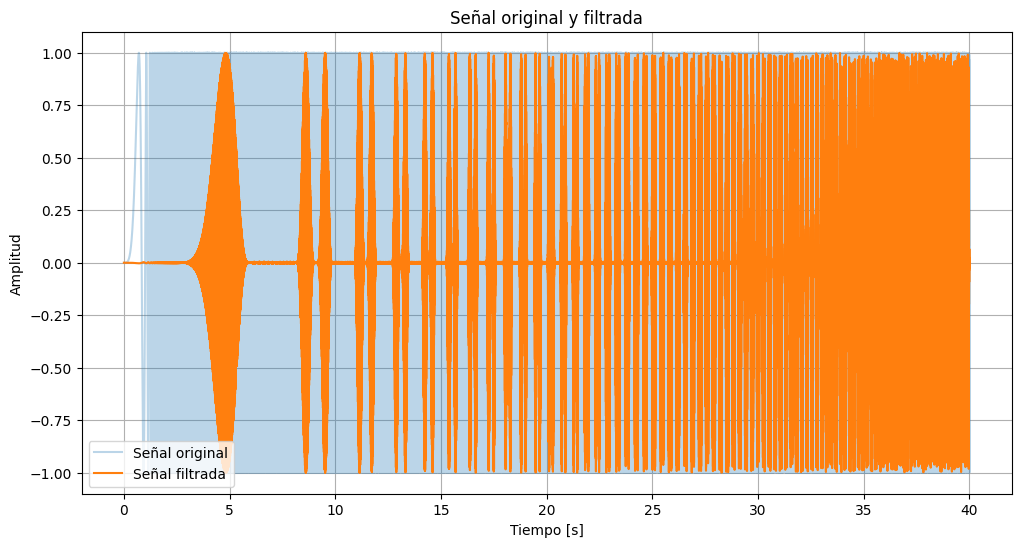

In [10]:
#Respuesta del filtro ante la señal
signal_filtered = np.convolve(signal_3, num, mode='same')

#Graficar señal antes y despues de pasar por el filtro
plt.figure(figsize=(12, 6))
plt.plot(t, signal_3, label='Señal original', alpha=0.3)
plt.plot(t, signal_filtered, label='Señal filtrada')
plt.title('Señal original y filtrada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()


Al igual que en el caso anterior, al aplicar el filtro pasa bandas FIR a la señal sinusoidal con frecuencia cúbica, ademas, se presenta el firmo fenomeno al aumentar demasiado la frecuencia de la señal, el filtro no es capaz de seguir la señal y se pierde la información.

## Agregando polos y ceros al sistema

### 1. Retorne al sistema anterior con n = 10.

In [16]:
#Filtro FIR
n = 10
num = signal.firwin(n, [0.1, 0.4], pass_zero=False)
den=np.zeros(n)
den[0] = 1



### 2. Use la función computeZ(num, den, zeros, poles, data) que se encuentra en el archivo adjunto (ztrans.py) para agregar polos y ceros a una función de transferencia.


<Figure size 640x480 with 0 Axes>

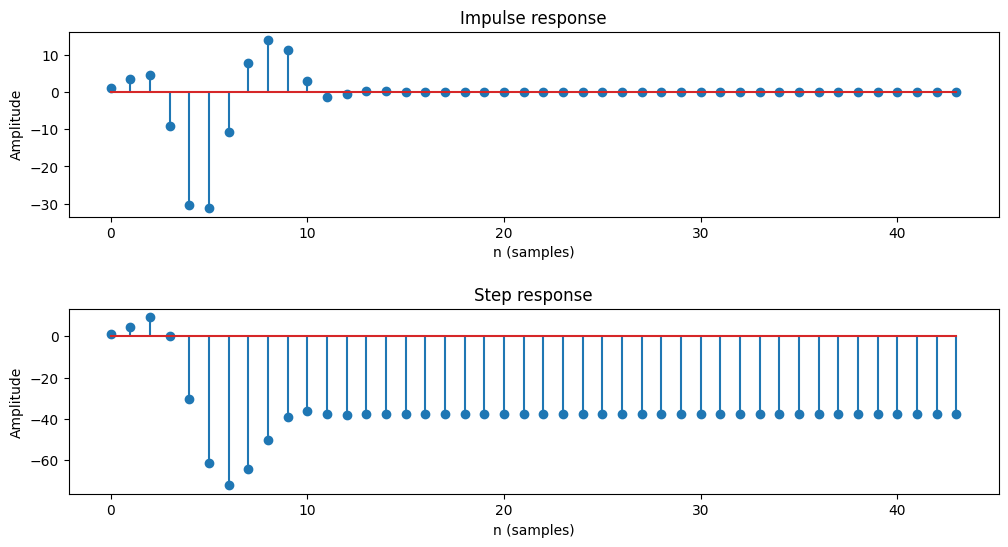

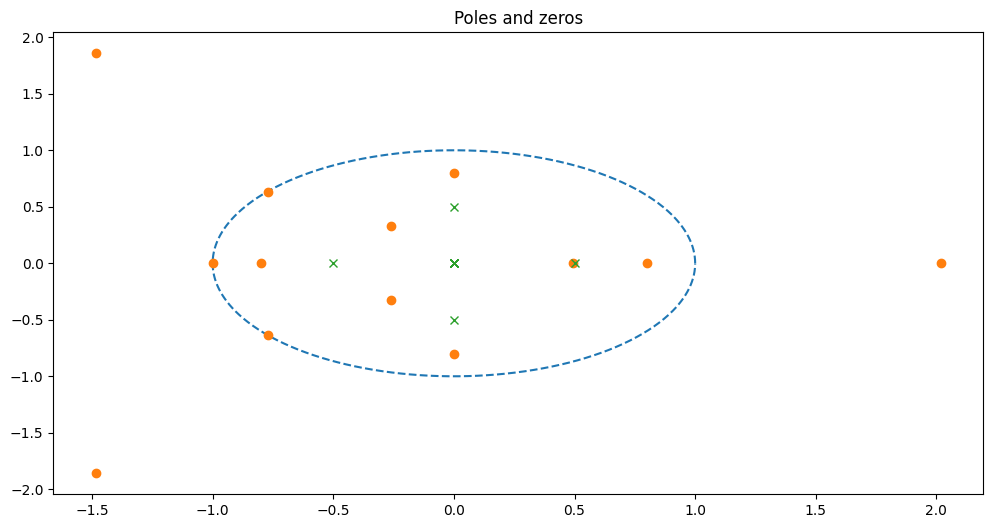

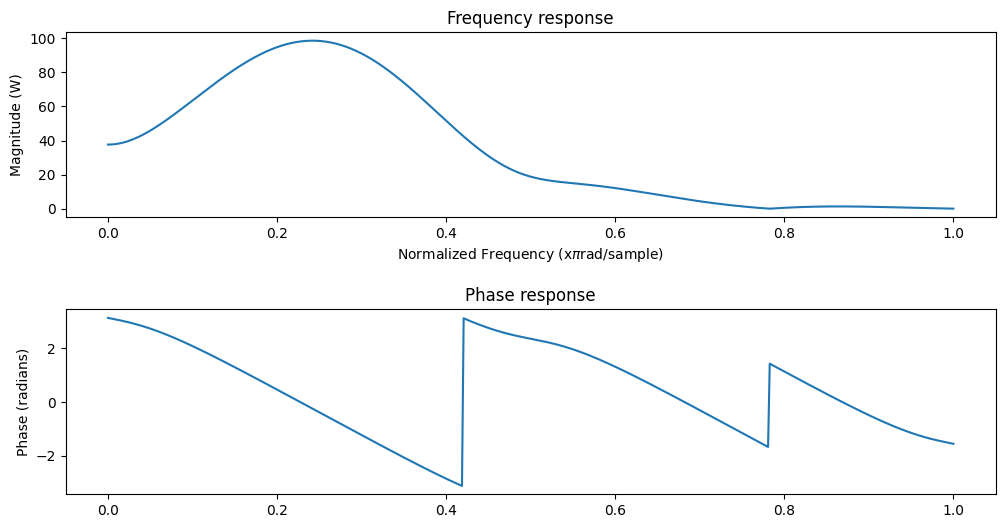

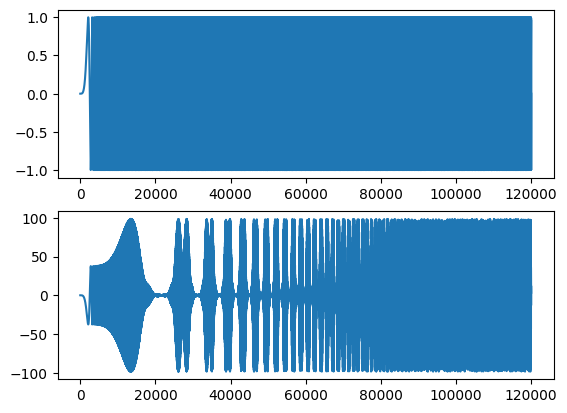

In [17]:
### 2. Use la función computeZ(num, den, zeros, poles, data) que se encuentra en el archivo adjunto (ztrans.py) para agregar polos y ceros a una función de transferencia.

#Funcion de transferencia

zeros = [0.8, 0.8j, -0.8j, -0.8]
poles = [0.5, -0.5j, 0.5j, -0.5]

zt.computeZ(num, den, zeros, poles, signal_3)

### 3. Explique el comportamiento del sistema si se agrega de forma independiente:

- Dos ceros conjugados de magnitud 1.3
- Un polo real de magnitud 1.4


<Figure size 640x480 with 0 Axes>

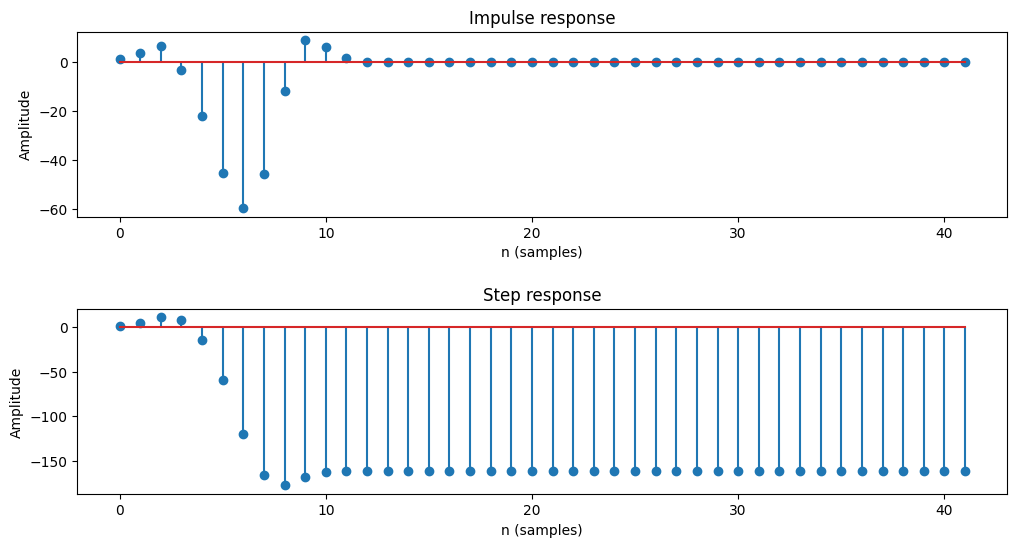

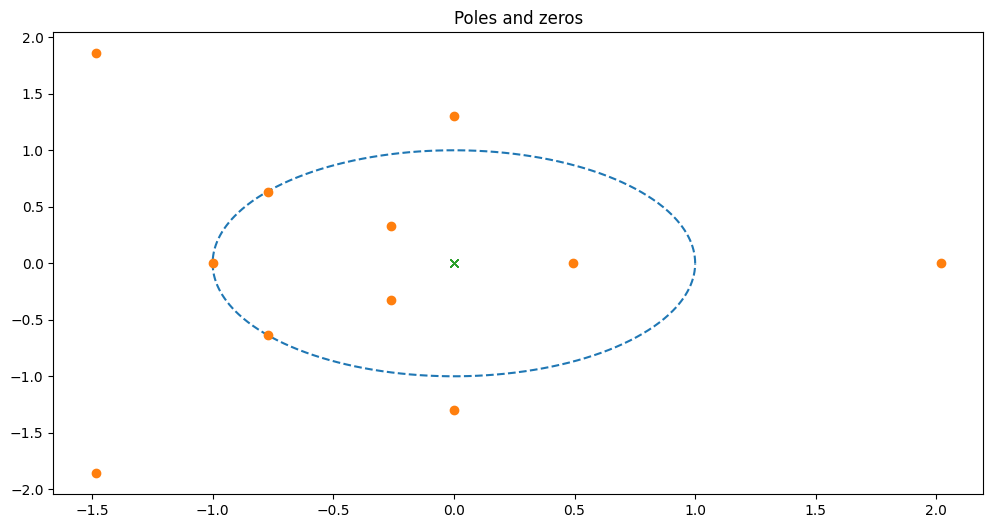

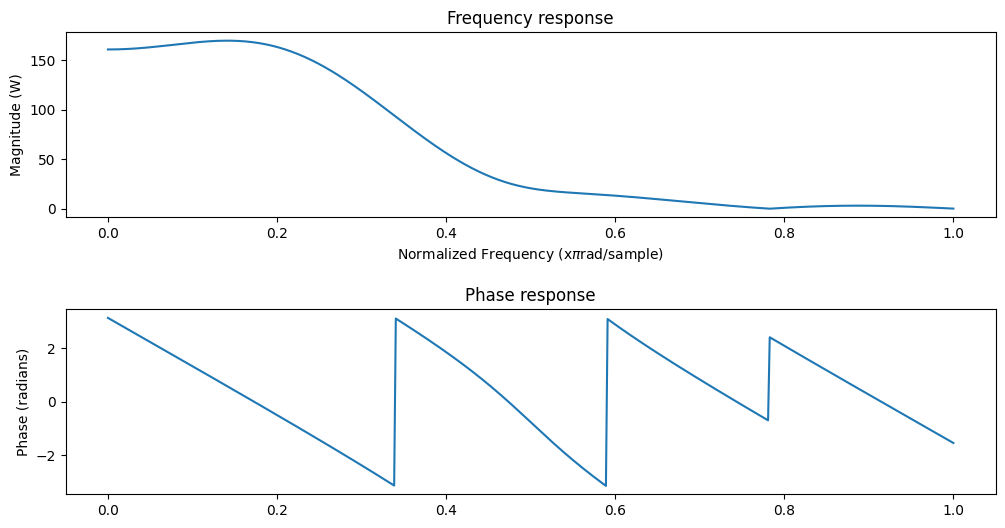

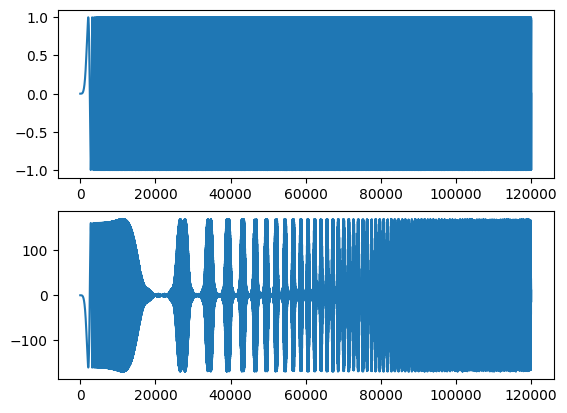

In [19]:
#Funcion de transferencia

zeros = [-1.3j, 1.3j]
poles = [1.4]

zt.computeZ(num, den, zeros, poles, signal_3)

Al agrega un polo por fuera del circulo unitario, nuestro sistema se vuelve inestable. Esto se puede observar en la respuesta al impulso, donde la amplitud crece exponencialmente. Si solo se agregan los ceos conjuados tiene implicaciones en la forma que toma el filtro en el dominio de la frecuencia, pero no en su estabilidad. En este caso se convierte en un filtro pasa bajos.

## Conclusiones
- Al aumentar el orden del filtro FIR, la respuesta en frecuencia se vuelve más nítida y se asemeja más a un filtro ideal. Sin embargo, también se observa que la respuesta al impulso se alarga y se dispersa, lo que puede causar distorsión en la señal filtrada.

- En cuanto a la señal sinusoidal con frecuencia cuadrática, al pasar por el filtro FIR, la señal se atenúa y distorsiona debido a la respuesta en frecuencia del filtro y a la convolución de la señal con la respuesta al impulso del filtro.

- Los filtros FIR tienen una respuesta al impulso de duración finita, lo que puede causar distorsión en la señal filtrada, especialmente si el orden del filtro es alto. No obstante, tienen la ventaja de ser fácilmente implementables en hardware y de ofrecer una respuesta en frecuencia nítida y controlable.

- Los filtros FIR son ideales para aplicaciones que requieren una respuesta de fase lineal.

- Las principales ventajas de los filtros FIR incluyen: fase exactamente lineal, estabilidad garantizada, métodos de diseño lineales, implementación eficiente en hardware y transitorios de inicio de duración finita.

- La transformada Z es una herramienta muy útil para el análisis de sistemas discretos. Permite analizar la estabilidad de un sistema, su respuesta en frecuencia, y su respuesta al impulso y al escalón. Además, es posible agregar polos y ceros a una función de transferencia para modificar su respuesta en frecuencia.

